In [1]:
import requests # importing Requests
from bs4 import BeautifulSoup # Importing beautiful soup
import pandas as pd # importing pandas
import matplotlib.pyplot as plt # importing matplotlib for plotting the data
import numpy as np

postal = [] # creating empty lists for Postal Code, borough and neighborhood
borough = []
neigh = []

r = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M') # Using Get method, accessing the wikipedia page
soup = BeautifulSoup(r.text, 'html.parser') # Creating soup

table = soup.find('table') # scrapping data from the text acquired using soup
rows = table.find_all('tr') # data collection using  CSS selector 
for i in rows:
  values = [''.join(x.text.split('\n')) for x in i.find_all('td')] # Assigning values to the list created above using list comprehension.
  if len(values) != 0:
    if values[2] != 'Not assigned': # Ignoring values where Borough is "not assigned"
      postal.append(values[0])
      borough.append(values[1])
      neigh.append(values[2])

data = {'Postal Code' : postal, 'Borough' : borough, 'Neighborhood' : neigh}
df2 = pd.DataFrame(data) # creating a Data Frame 
print(df2)
df2.to_csv('test.csv') # saving data to a CSV file using df.to_csv method
print(df2.shape) # using .shape method as required
df2.head(10);
##########################################################################################################################################
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in IBM Cloud Object Storage.
# Credentials for IBM have been removed for security reasons .
client_ff808e1d3726483aab8d13d3be3efda0 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XXXXXXXXXXX',
    ibm_auth_endpoint="XXXXXXXXXXXXXXX",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_ff808e1d3726483aab8d13d3be3efda0.get_object(Bucket='segmentingandclusteringneighborho-donotdelete-pr-qlegq7uwglfpnt',Key='Geospatial_Coordinates.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()
 # displaying the Data frame using head()

    Postal Code           Borough  \
0           M3A        North York   
1           M4A        North York   
2           M5A  Downtown Toronto   
3           M6A        North York   
4           M7A  Downtown Toronto   
5           M9A         Etobicoke   
6           M1B       Scarborough   
7           M3B        North York   
8           M4B         East York   
9           M5B  Downtown Toronto   
10          M6B        North York   
11          M9B         Etobicoke   
12          M1C       Scarborough   
13          M3C        North York   
14          M4C         East York   
15          M5C  Downtown Toronto   
16          M6C              York   
17          M9C         Etobicoke   
18          M1E       Scarborough   
19          M4E      East Toronto   
20          M5E  Downtown Toronto   
21          M6E              York   
22          M1G       Scarborough   
23          M4G         East York   
24          M5G  Downtown Toronto   
25          M6G  Downtown Toronto   
2

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [3]:
All_toronto_data = pd.merge(df2, df_data_1, how='inner', on = 'Postal Code')

In [4]:
All_toronto_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [5]:

body = client_ff808e1d3726483aab8d13d3be3efda0.get_object(Bucket='segmentingandclusteringneighborho-donotdelete-pr-qlegq7uwglfpnt',Key='Updated_Combined_Toronto_Missisuaga.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Combined_Toronto_Misssauga = pd.read_csv(body)
Combined_Toronto_Misssauga.head()


,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [6]:
## Impoirting Necessary Libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [8]:
CLIENT_ID = 'UIMWTUCAFPDQ4Y2ZFJG4PIDDG0UI' # your Foursquare ID
CLIENT_SECRET = 'X5CTCO3YZ4CD0GYDIDLPC00' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UIMWTUCAFPDQ4Y2ZFJG4PIDDG0UIWWW4WUS1YZIGTU51155C
CLIENT_SECRET:X5CTCO3YZ4CD0GYDIDLPC004B2XB05XE0BXF032Z0IK0QXVB


In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [10]:
def getNearbyVenues(names, latitudes, longitudes, radius= 6000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [11]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API



radius =   6000 # define radius


All_toronto_And_Missisauga_venues = getNearbyVenues(names=Combined_Toronto_Misssauga['Neighborhood'],
                                   latitudes=Combined_Toronto_Misssauga['Latitude'],
                                   longitudes=Combined_Toronto_Misssauga['Longitude']
                                  )


Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grov...
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe...
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsvie

In [12]:
print(All_toronto_And_Missisauga_venues.shape) # Displaying All the venues in Toronto and Missisauga Neighboorhoods within 6km radius of each neighborhood


(12367, 7)


In [13]:
All_toronto_And_Missisauga_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Galleria Supermarket,43.753520,-79.349518,Supermarket
2,Parkwoods,43.753259,-79.329656,Naan & Kabob Halal,43.742903,-79.305148,Middle Eastern Restaurant
3,Parkwoods,43.753259,-79.329656,Starbucks Reserve Bar,43.735764,-79.344156,Coffee Shop
4,Parkwoods,43.753259,-79.329656,Me Va Me Kitchen Express,43.754957,-79.351894,Mediterranean Restaurant


In [14]:
col_rename = {'Neighborhood' : 'Neighborhood', 'Neighborhood Latitude' :'Neighborhood_Latitude', 'Neighborhood Longitude': 'Neighborhood_Longitude','Venue' : 'Venue', 'Venue Latitude' : 'Venue_Latitude','Venue Longitude' :'Venue_Longitude','Venue Category' : 'Venue_Category'}

In [15]:
All_Data_Updated_Cols = All_toronto_And_Missisauga_venues.rename(columns = col_rename )

In [16]:
All_Data_Updated_Cols.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Parkwoods,43.753259,-79.329656,Allwyn's Bakery,43.759840,-79.324719,Caribbean Restaurant
1,Parkwoods,43.753259,-79.329656,Galleria Supermarket,43.753520,-79.349518,Supermarket
2,Parkwoods,43.753259,-79.329656,Naan & Kabob Halal,43.742903,-79.305148,Middle Eastern Restaurant
3,Parkwoods,43.753259,-79.329656,Starbucks Reserve Bar,43.735764,-79.344156,Coffee Shop
4,Parkwoods,43.753259,-79.329656,Me Va Me Kitchen Express,43.754957,-79.351894,Mediterranean Restaurant


In [20]:
Venue_Category = All_Data_Updated_Cols['Venue_Category']

In [21]:
Venue_Category.value_counts() # This will show venues for  overlapped boundaries of each neighborhood and will repeat same resturants but clarify the corverage of each competitor location

Coffee Shop                      792
Park                             662
Café                             473
Bakery                           420
Italian Restaurant               393
Grocery Store                    286
Restaurant                       263
Liquor Store                     233
Japanese Restaurant              202
Gym                              201
Middle Eastern Restaurant        200
Supermarket                      197
Pizza Place                      196
Sandwich Place                   190
Indian Restaurant                181
Ice Cream Shop                   180
Hotel                            178
Brewery                          168
Clothing Store                   157
Burger Joint                     152
Caribbean Restaurant             146
Sushi Restaurant                 145
Breakfast Spot                   145
Furniture / Home Store           136
Gastropub                        130
Asian Restaurant                 123
Dessert Shop                     120
S

In [22]:
Venue_Category.unique()

array(['Caribbean Restaurant', 'Supermarket', 'Middle Eastern Restaurant',
       'Coffee Shop', 'Mediterranean Restaurant',
       'Health & Beauty Service', 'Italian Restaurant', 'Event Space',
       'Shopping Mall', 'Café', 'Grocery Store', 'Greek Restaurant',
       'Vietnamese Restaurant', 'Golf Course', 'Park', 'History Museum',
       'Thai Restaurant', 'New American Restaurant', 'Seafood Restaurant',
       'Falafel Restaurant', 'Bagel Shop', 'Botanical Garden',
       'Steakhouse', 'Chocolate Shop', 'Restaurant', 'Sushi Restaurant',
       'Other Great Outdoors', 'Liquor Store', 'Burrito Place',
       'Japanese Restaurant', 'Bakery', 'Burger Joint',
       'Toy / Game Store', 'Breakfast Spot', 'Furniture / Home Store',
       'Fish Market', 'Pizza Place', 'Pet Store', 'BBQ Joint', 'Dog Run',
       'Turkish Restaurant', 'Arts & Crafts Store', 'Sandwich Place',
       'General Entertainment', 'Bank', 'Gym / Fitness Center',
       'Bubble Tea Shop', 'Fast Food Restaurant', 'B

In [23]:
Venue_Category.describe()

count           12367
unique            258
top       Coffee Shop
freq              792
Name: Venue_Category, dtype: object

In [21]:
# Thus we have 258 Unique Categories of Venues.

In [25]:
Middle_Eastern_Restaurant = All_Data_Updated_Cols.loc[All_Data_Updated_Cols['Venue_Category'] == 'Middle Eastern Restaurant']


In [26]:
Turkish_Restaurant = All_Data_Updated_Cols.loc[All_Data_Updated_Cols['Venue_Category'] == 'Turkish Restaurant']
Turkish_Restaurant.head(100)

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
53,Parkwoods,43.753259,-79.329656,Baran's Turkish Restaurant & Bar,43.728978,-79.280811,Turkish Restaurant
116,Victoria Village,43.725882,-79.315572,Baran's Turkish Restaurant & Bar,43.728978,-79.280811,Turkish Restaurant
824,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Baran's Turkish Restaurant & Bar,43.728978,-79.280811,Turkish Restaurant
1363,Don Mills,43.725900,-79.340923,Baran's Turkish Restaurant & Bar,43.728978,-79.280811,Turkish Restaurant
2638,Cedarbrae,43.773136,-79.239476,Baran's Turkish Restaurant & Bar,43.728978,-79.280811,Turkish Restaurant
3196,Scarborough Village,43.744734,-79.239476,Baran's Turkish Restaurant & Bar,43.728978,-79.280811,Turkish Restaurant
3787,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,Baran's Turkish Restaurant & Bar,43.728978,-79.280811,Turkish Restaurant
4388,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,Baran's Turkish Restaurant & Bar,43.728978,-79.280811,Turkish Restaurant
5096,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,Baran's Turkish Restaurant & Bar,43.728978,-79.280811,Turkish Restaurant
5823,"Birch Cliff, Cliffside West",43.692657,-79.264848,Baran's Turkish Restaurant & Bar,43.728978,-79.280811,Turkish Restaurant


In [24]:
Falafel_Restaurant = All_Data_Updated_Cols.loc[All_Data_Updated_Cols['Venue_Category'] == 'Falafel Restaurant']
Falafel_Restaurant.head(100)

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
20,Parkwoods,43.753259,-79.329656,Tasty Shawarma & Falafel,43.776126,-79.318424,Falafel Restaurant
38,Parkwoods,43.753259,-79.329656,Family Shawarma & Falafel,43.776291,-79.316756,Falafel Restaurant
193,Victoria Village,43.725882,-79.315572,Tasty Shawarma & Falafel,43.776126,-79.318424,Falafel Restaurant
325,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Euro Shawarma,43.726024,-79.481805,Falafel Restaurant
754,Don Mills,43.745906,-79.352188,Tasty Shawarma & Falafel,43.776126,-79.318424,Falafel Restaurant
796,Don Mills,43.745906,-79.352188,Family Shawarma & Falafel,43.776291,-79.316756,Falafel Restaurant
2721,Hillcrest Village,43.803762,-79.363452,Tasty Shawarma & Falafel,43.776126,-79.318424,Falafel Restaurant
2777,Hillcrest Village,43.803762,-79.363452,Family Shawarma & Falafel,43.776291,-79.316756,Falafel Restaurant
3297,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Tasty Shawarma & Falafel,43.776126,-79.318424,Falafel Restaurant
3315,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Family Shawarma & Falafel,43.776291,-79.316756,Falafel Restaurant


In [27]:
Afghan_Restaurant = All_Data_Updated_Cols.loc[All_Data_Updated_Cols['Venue_Category'] == 'Afghan Restaurant']
Afghan_Restaurant.head(100)

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
74,Parkwoods,43.753259,-79.329656,Bamiyan Kabob,43.707824,-79.343446,Afghan Restaurant
121,Victoria Village,43.725882,-79.315572,Bamiyan Kabob,43.707824,-79.343446,Afghan Restaurant
747,Don Mills,43.745906,-79.352188,Bamiyan Kabob,43.707824,-79.343446,Afghan Restaurant
813,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,Bamiyan Kabob,43.707824,-79.343446,Afghan Restaurant
1313,Don Mills,43.725900,-79.340923,Bamiyan Kabob,43.707824,-79.343446,Afghan Restaurant
1421,Woodbine Heights,43.695344,-79.318389,Bamiyan Kabob,43.707824,-79.343446,Afghan Restaurant
2295,Leaside,43.709060,-79.363452,Bamiyan Kabob,43.707824,-79.343446,Afghan Restaurant
2890,Thorncliffe Park,43.705369,-79.349372,Bamiyan Kabob,43.707824,-79.343446,Afghan Restaurant
3549,"East Toronto, Broadview North (Old East York)",43.685347,-79.338106,Bamiyan Kabob,43.707824,-79.343446,Afghan Restaurant
4442,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,Bamiyan Kabob,43.707824,-79.343446,Afghan Restaurant


In [28]:
Persian_Restaurant = All_Data_Updated_Cols.loc[All_Data_Updated_Cols['Venue_Category'] == 'Persian Restaurant']
Persian_Restaurant.head(100)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
5246,"Willowdale, Newtonbrook",43.789053,-79.408493,Shatter Abbas,43.769998,-79.374434,Persian Restaurant
5936,"Willowdale, Willowdale East",43.770120,-79.408493,Shatter Abbas,43.769998,-79.374434,Persian Restaurant
6647,York Mills West,43.752758,-79.400049,Shatter Abbas,43.769998,-79.374434,Persian Restaurant


In [41]:
Indian_Restaurant = All_Data_Updated_Cols.loc[All_Data_Updated_Cols['Venue_Category'] == 'Indian Restaurant']
Indian_Restaurant.Venue.value_counts()

Pukka Restaurant                            20
Udupi Palace                                12
Curry Twist                                 12
Royal Paan                                  11
Kairali                                     10
CANBE Foods Inc                              9
Bombay Bhel                                  9
Saravanaa Bhavan                             8
Anjappar Authentic Chettinadu Restaurant     8
Tich - Modern Indian Cuisine                 7
Mr. India Grocers                            7
Samosa King - Embassy Restaurant             7
Patna Kebab House                            7
Sultan Of Samosas                            6
Saravanaa Bhavan South Indian Restaurant     6
Rajdhani Sweets & Restaurant                 5
Madras Dosa Hut                              5
Samosa & Sweet Factory                       4
Sweet India                                  3
Govardhan Thal                               3
Guru Lukshmi                                 2
Swagruhas Dos

In [29]:
Pakistani_Restaurant = All_Data_Updated_Cols.loc[All_Data_Updated_Cols['Venue_Category'] == 'Pakistani Restaurant']
Pakistani_Restaurant.head(100)

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
1473,Woodbine Heights,43.695344,-79.318389,Lahore Tikka House,43.671668,-79.324704,Pakistani Restaurant
1962,The Beaches,43.676357,-79.293031,Lahore Tikka House,43.671668,-79.324704,Pakistani Restaurant
5886,"Birch Cliff, Cliffside West",43.692657,-79.264848,Lahore Tikka House,43.671668,-79.324704,Pakistani Restaurant
10455,Erin Mills_Missisauga,43.558600,-79.711600,Karachi Kitchen,43.580193,-79.758193,Pakistani Restaurant
10524,Churchill Meadows_Missisauga,43.552800,-79.746700,Karachi Kitchen,43.580193,-79.758193,Pakistani Restaurant
10677,credit valley_Missisauga,43.559000,-79.703000,Karachi Kitchen,43.580193,-79.758193,Pakistani Restaurant
11050,Erin Mills_Missisauga,43.549100,-79.717500,Karachi Kitchen,43.580193,-79.758193,Pakistani Restaurant
11520,Lisgar_Missisauga,43.598300,-79.785400,Karachi Kitchen,43.580193,-79.758193,Pakistani Restaurant
12334,Streetsville_Missisauga,43.587700,-79.720400,Karachi Kitchen,43.580193,-79.758193,Pakistani Restaurant


In [36]:
Park = All_Data_Updated_Cols.loc[All_Data_Updated_Cols['Venue_Category'] == 'Park']




In [37]:
Movie_Theater = All_Data_Updated_Cols.loc[All_Data_Updated_Cols['Venue_Category'] == 'Movie Theater']


In [38]:
Super_Market = All_Data_Updated_Cols.loc[All_Data_Updated_Cols['Venue_Category'] == 'Supermarket']


In [39]:
Shopping_Mall = All_Data_Updated_Cols.loc[All_Data_Updated_Cols['Venue_Category'] == 'Shopping Mall']


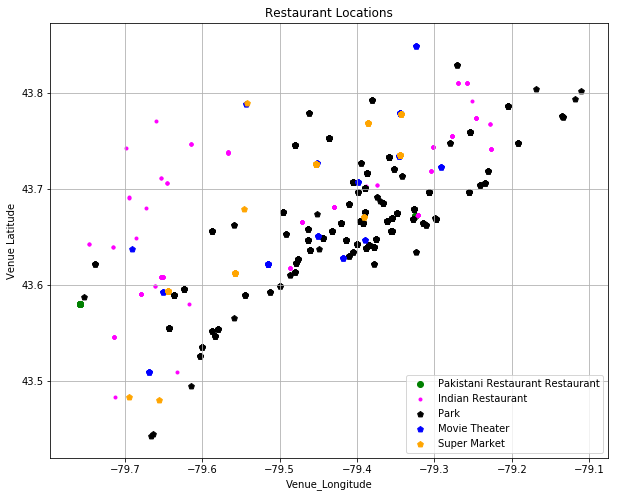

In [42]:
import matplotlib.pyplot as plt # importing matplotlib for plotting the data
plt.rcParams['figure.figsize'] = [10, 8]
plt.scatter(Pakistani_Restaurant["Venue_Longitude"], Pakistani_Restaurant["Venue_Latitude"], marker='o', c="green", label="Pakistani Restaurant Restaurant")
plt.scatter(Middle_Eastern_Restaurant["Venue_Longitude"], Middle_Eastern_Restaurant["Venue_Latitude"], marker='o', c="red", label="Middle Eastern Restaurant")
#plt.scatter(Turkish_Restaurant["Venue_Longitude"], Turkish_Restaurant["Venue_Latitude"], marker='v', c="orange", label="Turkish Restaurant")
#plt.scatter(Falafel_Restaurant["Venue_Longitude"], Falafel_Restaurant["Venue_Latitude"], marker='s', c="blue", label="Falafel Restaurant")
#plt.scatter(Afghan_Restaurant["Venue_Longitude"], Afghan_Restaurant["Venue_Latitude"], marker='d', c="yellow", label="Afghan Restaurant")
#plt.scatter(Persian_Restaurant["Venue_Longitude"], Persian_Restaurant["Venue_Latitude"], marker='<', c="cyan", label="Persian Restaurant")
plt.scatter(Indian_Restaurant["Venue_Longitude"], Indian_Restaurant["Venue_Latitude"], marker='.', c="magenta", label="Indian Restaurant")
plt.scatter(Park["Venue_Longitude"], Park["Venue_Latitude"], marker='p', c="black", label="Park")
plt.scatter(Movie_Theater["Venue_Longitude"], Movie_Theater["Venue_Latitude"], marker='p', c="blue", label="Movie Theater")
plt.scatter(Shopping_Mall["Venue_Longitude"], Shopping_Mall["Venue_Latitude"], marker='p', c="orange", label="Super Market")
plt.grid()
plt.title("Restaurant Locations")
plt.xlabel("Venue_Longitude")
plt.ylabel("Venue Latitude")
plt.legend(numpoints=1)
plt.show()

In [35]:
!conda install -c conda-forge folium=0.5.0 --yes # Installing Folium Map rendering Library
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ------------------------------------------------------------
                       

In [47]:
# Displaying the Results using Folium Map rendering Library 

import folium
m = folium.Map(
    location=[43.753259, -79.329656],
    zoom_start=12,
    tiles='Stamen Terrain'
)

for pos in np.array(Pakistani_Restaurant):
    folium.Marker(
        location=[pos[4], pos[5]],
        popup=pos[6]+":" +str(pos[4])+":"+str(pos[5]),
        icon=folium.Icon(color='green')
    ).add_to(m)

#for pos in np.array(Middle_Eastern_Restaurant):
  #  folium.Marker(
   #     location=[pos[4], pos[5]],
       # popup=pos[6]+":" +str(pos[4])+":"+str(pos[5]),
        #icon=folium.Icon(color='red')
  #  ).add_to(m)
    
#for pos in np.array(Turkish_Restaurant):
    #folium.Marker(
       # location=[pos[4], pos[5]],
       # popup=pos[6]+":" +str(pos[4])+":"+str(pos[5]),
        #icon=folium.Icon(color='orange')
 #   ).add_to(m)

#for pos in np.array(Falafel_Restaurant):
  #  folium.Marker(
     #   location=[pos[4], pos[5]],
      #  popup=pos[6]+":" +str(pos[4])+":"+str(pos[5]),
      #  icon=folium.Icon(color='blue')
  #  ).add_to(m)

#for pos in np.array(Afghan_Restaurant):
   # folium.Marker(
    #    location=[pos[4], pos[5]],
    #    popup=pos[6]+":" +str(pos[4])+":"+str(pos[5]),
    #    icon=folium.Icon(color='lightgreen')
   # ).add_to(m)

#for pos in np.array(Persian_Restaurant):
    #folium.Marker(
       # location=[pos[4], pos[5]],
       # popup=pos[6]+":" +str(pos[4])+":"+str(pos[5]),
      #  icon=folium.Icon(color='beige')
   # ).add_to(m)

for pos in np.array(Indian_Restaurant):
    folium.Marker(
        location=[pos[4], pos[5]],
        popup=pos[6]+":" +str(pos[4])+":"+str(pos[5]),
        icon=folium.Icon(color='black')
    ).add_to(m)

for pos in np.array(Park):
    folium.Marker(
        location=[pos[4], pos[5]],
        popup=pos[6]+":" +str(pos[4])+":"+str(pos[5]),
        icon=folium.Icon(color='purple')
    ).add_to(m)

for pos in np.array(Movie_Theater):
    folium.Marker(
        location=[pos[4], pos[5]],
        popup=pos[6]+":" +str(pos[4])+":"+str(pos[5]),
        icon=folium.Icon(color='pink')
    ).add_to(m)

for pos in np.array(Super_Market):
    folium.Marker(
        location=[pos[4], pos[5]],
        popup=pos[6]+":" +str(pos[4])+":"+str(pos[5]),
        icon=folium.Icon(color='orange')
    ).add_to(m)     
     
for pos in np.array(Shopping_Mall):
    folium.Marker(
        location=[pos[4], pos[5]],
        popup=pos[6]+":" +str(pos[4])+":"+str(pos[5]),
        icon=folium.Icon(color='darkblue')
    ).add_to(m)     
m